# Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Features/Variables Definitions

In [1]:
from IPython.display import Image
Image(url= "Capture.PNG")

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Reading Training Dataset 

In [3]:
pd.set_option('display.max_rows', None)

In [14]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Reading Testing Dataset 

In [5]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(train_data.shape,"\t",test_data.shape)

(891, 12) 	 (418, 11)


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
print(train_data.dtypes,'\n\n\n',test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 


 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# train_data['Age']=train_data['Age'].fillna(train_data['Age'].mode())

In [15]:
train_data['Age']=train_data['Age'].round()

In [ ]:
# train_data['Age'].astype(int)

In [16]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,714.0,29.693277,14.524527,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [17]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
# train_data.dropna(inplace=True)

# EDA

In [18]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

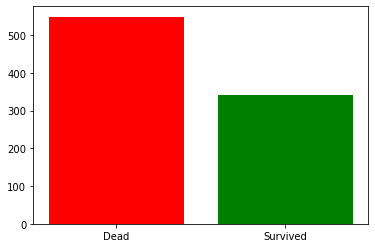

In [19]:
plt.bar(train_data['Survived'].value_counts().keys(),train_data['Survived'].value_counts(),color=["r","g"],tick_label=["Dead","Survived"])

In [20]:
train_data['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

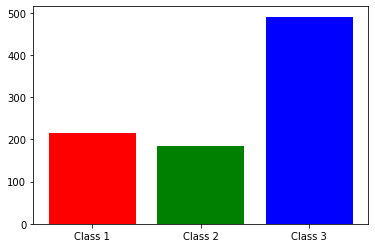

In [21]:
plt.bar(train_data['Pclass'].value_counts().keys().sort_values(),train_data['Pclass'].value_counts().sort_index(),color=["r","g",'b'],tick_label=["Class 1","Class 2",'Class 3'])

In [22]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

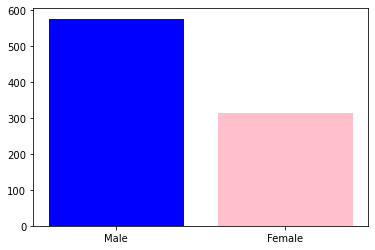

In [23]:
plt.bar(train_data['Sex'].value_counts().keys(),train_data['Sex'].value_counts(),color=["b","pink"],tick_label=["Male","Female"])

In [24]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(len(women),sum(women)) #len is for total number of women and sum is for the number of women that survived
print("% of women who survived:", rate_women)

314 233
% of women who survived: 0.7420382165605095


In [25]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(len(men),sum(men))#len is for total number of men and sum is for the number of men that survived
print("% of men who survived:", rate_men)

577 109
% of men who survived: 0.18890814558058924


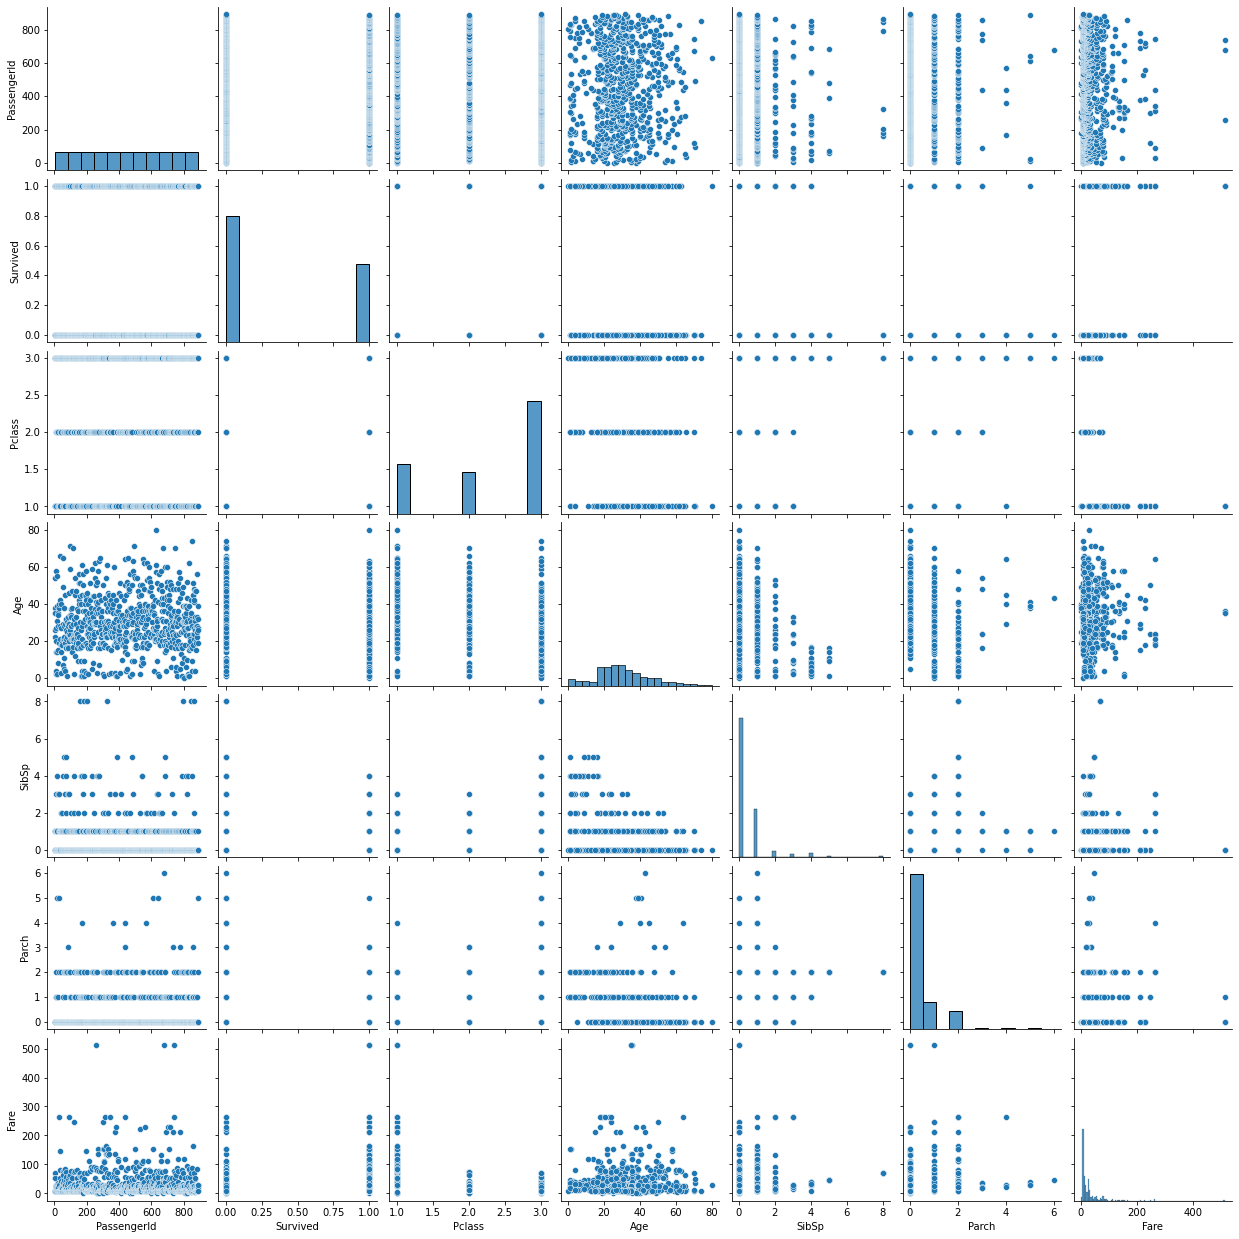

In [26]:
sns.pairplot(train_data)

# Modelling

In [27]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=1)
dt_model.fit(X, y)

predictions_dt = dt_model.predict(X_test)

In [32]:
rf_model = RandomForestClassifier(criterion='entropy',n_estimators=100, max_depth=5, random_state=1,min_samples_split=4)
rf_model.fit(X, y)

predictions_rf = rf_model.predict(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator = rf_model,param_grid = {'criterion' :['gini','entropy'],
                                                             'max_depth' :[3,5,7,8,10], 
                                                             'min_samples_split' :[2,3,4]})
grid_model.fit(X,y)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}
0.8047454648170234


In [34]:
grid_model = GridSearchCV(estimator = dt_model,param_grid = {'criterion' :['gini','entropy'],
                                                             'max_depth' :[3,5,7,8,10], 
                                                             'min_samples_split' :[2,3,4]})
grid_model.fit(X,y)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
0.7968802962776976


In [36]:
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_dt})

In [38]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_rf})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
